<a href="https://colab.research.google.com/github/Ruthnguli/Exploratory-Data-Analysis2/blob/main/Ruth_Nguli_week_4_IP_DS_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis : Univariate, Bivariate and Hypothesis testing

1. Defining the Question

a) Specifying the Data Analytic Question: Find out if weekdays are the popular days to pick up a shared electric car.



b) Defining the Metric for Success

To identify features which will be important in finding out if weekdays are popular days of picking a shared .

c) Understanding the context

Autolib' was an electric car sharing service which was inaugurated in Paris, France, in December 2011. It closed on 31 July 2018. It was operated by the Bollore industry and complemented the city's bike sharing system. The Autolib' service maintained a fleet of all electric Bollore Bluecars for public use. As of 3 July 2016, 3,980 Bluecars had been registered for the service and had more than 126,900 registered subscribers. Autolib furthermore offered 1,084 electric car stations in Paris agglomeration with 5,935 charging points.



d) Recording the Experimental Design

1. uploading data and reading it 
2. Tyding data
3. EDA analysis
3. Hypothesis testing
4. conclusion

e) Data Relevance

The dataset used is a Autolib excel dataset that was extracted from opendataparis.com, where the Autolib availability information was available in real-time. The dataset contains data collected for a period of 9 days based on a survey carried April 2018.


## 2. Reading Data

In [ ]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#Loading dataset 
autolib = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")

In [ ]:
#preview the head of data
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
#preview the tail of the data
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
#dertimining number of variables
print(autolib.shape)
print(" ")
print("********************************************")
print(autolib.info())



(16085, 13)
 
********************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB
N

This dataset has 16,085 rows and 13 columns. 
2 clomns are of object type and 11 columns are type integer

## 3. Tyding the Data

In [ ]:
#Aligning data and removing space
autolib.columns = autolib.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(','').str.replace(')','')
autolib.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
#checking null values
autolib.isna().any()


postal_code               False
date                      False
n_daily_data_points       False
dayofweek                 False
day_type                  False
bluecars_taken_sum        False
bluecars_returned_sum     False
utilib_taken_sum          False
utilib_returned_sum       False
utilib_14_taken_sum       False
utilib_14_returned_sum    False
slots_freed_sum           False
slots_taken_sum           False
dtype: bool

In [ ]:
#checking duplicates

autolib.duplicated().any()

False

This data does not contain any missing or duplicated values.

In [ ]:
#describing the data 

print(autolib.describe())
print(" ")
print("********************************************************************")
print(" ")
print(autolib.info())


        postal_code  n_daily_data_points  ...  slots_freed_sum  slots_taken_sum
count  16085.000000         16085.000000  ...     16085.000000     16085.000000
mean   88791.293876          1431.330619  ...        22.629033        22.629282
std     7647.342000            33.212050  ...        52.120263        52.146030
min    75001.000000          1174.000000  ...         0.000000         0.000000
25%    91330.000000          1439.000000  ...         0.000000         0.000000
50%    92340.000000          1440.000000  ...         0.000000         0.000000
75%    93400.000000          1440.000000  ...         5.000000         5.000000
max    95880.000000          1440.000000  ...       360.000000       359.000000

[8 rows x 11 columns]
 
********************************************************************
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------            

In [ ]:
#reviewing column names
print(autolib.columns)

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')


In [ ]:
#rename day of the week column to day_of_week
autolib = autolib.rename(columns={'dayofweek': 'day_of_week'})
autolib

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [ ]:
#looking into columns unique values
#postal_code
print(autolib['postal_code'].unique())

[75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]


In [ ]:
#date column
print(autolib['date'].unique())

['1/1/2018' '1/2/2018' '1/3/2018' '1/4/2018' '1/5/2018' '1/6/2018'
 '1/7/2018' '1/8/2018' '1/9/2018' '1/10/2018' '1/11/2018' '1/12/2018'
 '1/13/2018' '1/14/2018' '1/15/2018' '1/16/2018' '1/17/2018' '1/18/2018'
 '1/19/2018' '1/20/2018' '1/21/2018' '1/22/2018' '1/23/2018' '1/24/2018'
 '1/25/2018' '1/26/2018' '1/27/2018' '1/28/2018' '1/29/2018' '1/30/2018'
 '1/31/2018' '2/1/2018' '2/2/2018' '2/3/2018' '2/4/2018' '2/5/2018'
 '2/6/2018' '2/7/2018' '2/8/2018' '2/9/2018' '2/10/2018' '2/11/2018'
 '2/12/2018' '2/13/2018' '2/14/2018' '2/15/2018' '2/16/2018' '2/17/2018'
 '2/18/2018' '2/19/2018' '2/20/2018' '2/21/2018' '2/22/2018' '2/23/2018'
 '2/24/2018' '2/28/2018' '3/1/2018' '3/2/2018' '3/3/2018' '3/4/2018'
 '3/5/2018' '3/6/2018' '3/7/2018' '3/8/2018' '3/9/2018' '3/10/2018'
 '3/11/2018' '3/12/2018' '3/13/2018' '3/14/2018' '3/15/2018' '3/16/2018'
 '3/17/2018' '3/18/2018' '3/19/2018' '3/20/2018' '3/21/2018' '3/22/2018'
 '3/23/2018' '3/24/2018' '3/25/2018' '3/26/2018' '3/27/2018' '3/28/2018'
 '3/2

In [ ]:
#n_daily_data_pointse column
print(autolib['n_daily_data_points'].unique())

[1440 1438 1439 1320 1437 1434 1398 1420 1425 1396 1429 1389 1380 1364
 1318 1377 1203 1417 1435 1174 1436 1411 1370]


In [ ]:
#dayofweek column
print(autolib['day_of_week'].unique())

[0 1 2 3 4 5 6]


In [ ]:
#day type column
print(autolib['day_type'].unique())

['weekday' 'weekend']


In [ ]:
#bluecars_taken_sum column
print(autolib['bluecars_taken_sum'].unique())

[ 110   98  138  104  114  187  180   84   81   88  125  126  224  193
  107  116  118  122  130  217  143  123  112  108  145  216  190   83
  103  146  199  186  121  113  109  207  160  115   94   99  119  176
  157   85  100  135    8   92  127  136  192  168  102  134  197  173
  131  196  150  156  231  105  219  179  124  188  139   97  120  159
  147  151  129  152  142  141  202  175   96  133  254  137  185  203
    6  166  165  243  264  213  164  163  191  276  210  183  148  270
  128  280  178  153  158  259  161  240   12  181  140  263  167  177
  250  208  171  266  155  247  154  184  293  228  182  144  218  162
  239  200  170  174  172  245    5  195  237  331  283  212  211  380
  356  233  220  238  384  313  229  221  201  350  327  223  226  234
  262  361  335  205  198  346  303  236  341  277  206   25  230  330
  286  265  251  412  340  227  357  319  189  375  326  311  284  255
  209  215  323  256  204  214  382  315  310  333  260  297  258  241
  235 

In [ ]:
#bbluecars_returned_summ column
print(autolib['bluecars_returned_sum'].unique())


[ 103   94  139  104  117  185  180   83   84   85  125  127  223  193
  107  116  118  122  130  217  150  113  146  218  189   81  110  147
  204  121   99  112  109  207  165  111   93  119  176  158   86   98
  135    9   91  131  137  138  208  177  124  101  145  203  169   96
  136  142  196  154  100   97  144  128  179  151  115  232  105  219
  143  190  102  159  155  156  120  141  201  133  253  199   95  108
  188  126  206  174    7  244  197  153  264  148  164  277  213  149
  175  270  198  280  161  178  152  160  257  205  240  123  157   12
  265  186  173  140  171  167  255  209  170  266  248  243  183  292
  222  134  236  132  181  172  184  168  162  237  163  233  202  283
  192  252  211    6  250  187  229  249  338  293  214  212  228  379
  359  220  225  245  400  307  221  224  367  334  274  344  340  317
  235  342  290  182  241  332  297  195  231  414  329  210  366  319
  247  376  331  322  271  328  267  377  311  281  339  305  216  258
  284 

In [ ]:
#utilib_taken_sum column
print(autolib['utilib_taken_sum'].unique())

[ 3  1  0  2  6  5  4  7  8  9 11 17 10 13 18 12 15 16 21 19 14 34 31 23
 20 22 24 29 25 28 26 27 46 32 30 43 38 37 40 45 54 36 35 39 42 33 41 47]


In [ ]:
#utilib_returned_sum column
print(autolib['utilib_returned_sum'].unique())

[ 2  1  0  3  6  5  4  7  8  9 11 17 10 13 18 14 15 12 21 20 16 19 35 32
 23 22 24 25 27 26 30 49 28 31 29 43 38 39 36 34 47 45 33 58 41 37 42 40
 44]


In [ ]:
#utilib_14_taken_sum column
print(autolib['utilib_14_taken_sum'].unique())

[ 10   8   2   9   6   7   4  11  13  12  15  25   5  14   3  17  16   0
   1  21  18  19  22  20  27  23  24  29  26  28  30  33  41  36  34  40
  50  45  32  31  35  37  42  38  48  47  52  39  53  43  56  51  75  49
  55  44  46  54  57  61  60  70  58  68  62  64  59  66  63  65  72  89
  82  69  71  79  84  73  81  80  67  90 100  91  85  74  76  94  78  95
  87  93]


In [ ]:
#utilib_14_treturned_sum column
print(autolib['utilib_14_returned_sum'].unique())

[  9   8   2   6  10   4  11  13  12  15   7  25   5  14   3  17  16   0
   1  21  18  19  20  22  27  23  24  29  34  41  28  35  32  30  26  33
  43  50  44  31  36  40  38  48  37  47  53  45  39  51  54  52  46  74
  42  57  49  60  63  61  55  66  59  58  67  68  62  64  71  56  69  84
  70  72  86  76  80  89  73  94  79  65  93  78  75  77  82  85  88 101
  87  90  96  83]


In [ ]:
#slots_freed_sum	 column
print(autolib['slots_freed_sum'].unique())

[ 22  23  27  25  18  38  34  14  15  11  19  16  21  17  41  24  20  35
  36  32  13  28  12  26   0  48  30  29  31  47  33  40  37   9  10  43
  44  49  39  42  45  51  46  59  64  56  52   1  50  95  84  83  81  58
  61  67 101  86  63  97  60  57  65  80  79  77  54  85  75  73  55   3
  62  82  71  69  74  89  91 109  70  76  72  68  78  53  66  87   2   5
 120 111  92 110  88 103 142 115 105 113 121  96  90 134 140 130  94  99
 128 100 129  98 118 106 119 117 102 107  93 135 104 122 133 108 112 116
 123 136 126   6 114 132 177 167 125 124 131 143 139 137 153 180 157 162
 152 151 149 156 145 173 147 211 127 141 161 144 163 138 171 158 148 168
 154 166 150 170 146 165 178 174 175 176 181 190 160 184 205 253 252 155
 193 204 221 214 169 197 196 200 199 191 185 183 208 159 218 215 179 216
 203 186 206   7 192 172 202 236 274 195 222 239 213 229 188 201 240 164
 226 220 182   8 194 248 289 286 234 302 254 189 235 319 277 284 360 249
 237 305 263 271 272 209 301 278 251 322 232 207 22

In [ ]:
#slots_taken_sum	 column
print(autolib['slots_taken_sum'].unique())

[ 20  22  27  21  35  34  15  13  38  19  39  25  14   9  37  36  30  16
  11  28  33  18  12   0  31  23  26  50  17  40  24  48  32   8  29  42
  43  49  45  41  44  52  59  46  65  47  57  51   1  97  87  54  84  83
  60  69 103  58  62  92  67  78  82  77  53  88  72  66  99  64  55  75
 113  63  74  71  89  68  81  73  70  61  79  56  76  86   2 118 108 107
 144 114  93 105 106 115 122  90  80  98  85 139 136 128  94 126  95   4
 130 102  96 129 138 111 124 101 109 116 110 134  91 119 137 100   3 104
 112   6 177 125 120 123 131 135 140 132 155 182 154 164 121 151 157 147
 117 153 160 141 172 161   5 213 145 143 162 127 148 169 149 171 167 163
 166 133 158 159 150 174 173 178 152   7 176 179 165 180 142 188 185 183
  10 210 252 249 199 196 228 205 201 181 193 184 207 168 225 187 212 186
 146 170 203 223 197 194 230 280 202 191 200 221 218 192 156 208 175 198
 233 204 222 220 189 215 245 214 209 248 287 286 229 240 295 211 321 272
 195 226 235 216 278 359 328 247 239 330 298 260 27

In [ ]:
print(autolib.columns)

Index(['postal_code', 'date', 'n_daily_data_points', 'day_of_week', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')


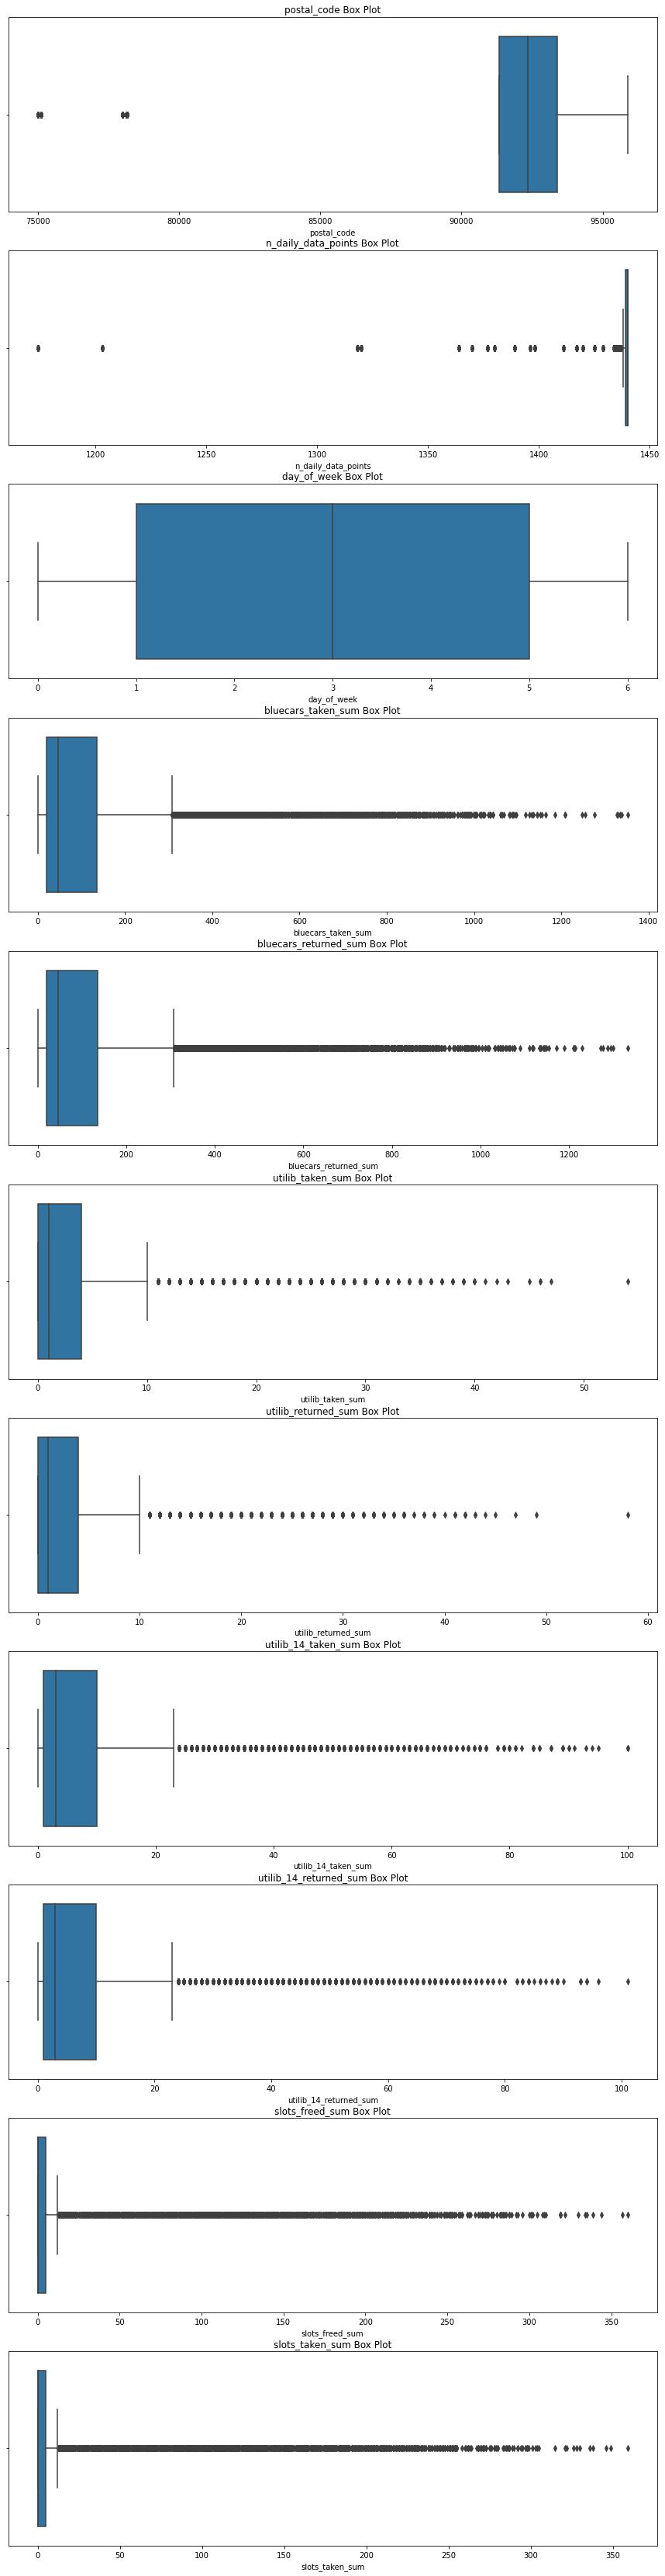

In [ ]:
##checking if the data contains outliears


col_names= ['postal_code','n_daily_data_points', 'day_of_week',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum']
   

fig, ax = plt.subplots(len(col_names), figsize=(15,60))

for i, col_val in enumerate(col_names):

    sns.boxplot(x=autolib[col_val], ax=ax[i])
    ax[i].set_title('{} Box Plot'.format(col_val))
    ax[i].set_xlabel(col_val)

plt.show()


From the above sub scatter plots it shows that postal code and daily data point columns are skewed to the left while day of the week column does not show any skewness. The other columns are right skewed. Only day of the week that does not have outliers the rest have outliers.

In [ ]:
#dealing with outliers 

Q1 = autolib.quantile(0.25)
Q3 = autolib.quantile(0.75)

IQR = Q3 - Q1
print(IQR)
print(" ")

print("___________________________________________________________________________________")

print(" ")

autolib_new = autolib[~((autolib < (Q1 - 1.5 * IQR)) | ((autolib > Q3 + 1.5 * IQR))).any(axis=1)]
print(autolib_new)

postal_code               2070.0
n_daily_data_points          1.0
day_of_week                  4.0
bluecars_taken_sum         115.0
bluecars_returned_sum      115.0
utilib_taken_sum             4.0
utilib_returned_sum          4.0
utilib_14_taken_sum          9.0
utilib_14_returned_sum       9.0
slots_freed_sum              5.0
slots_taken_sum              5.0
dtype: float64
 
___________________________________________________________________________________
 
       postal_code       date  ...  slots_freed_sum  slots_taken_sum
3899         91330   1/1/2018  ...                4                2
3900         91330   1/2/2018  ...                0                0
3901         91330   1/3/2018  ...                1                1
3903         91330   1/5/2018  ...                1                1
3905         91330   1/7/2018  ...                4                2
...            ...        ...  ...              ...              ...
16079        95880  6/14/2018  ...                0

In [ ]:
#converting the date column from object to datetime format

autolib_new['date'] = pd.to_datetime(autolib['date'], format='%m/%d/%Y')

print(autolib_new['date'].dtype)
print("  ")

print(autolib_new.info())
print("  ")

print(autolib_new.shape)

datetime64[ns]
  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9783 entries, 3899 to 16083
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   postal_code             9783 non-null   int64         
 1   date                    9783 non-null   datetime64[ns]
 2   n_daily_data_points     9783 non-null   int64         
 3   day_of_week             9783 non-null   int64         
 4   day_type                9783 non-null   object        
 5   bluecars_taken_sum      9783 non-null   int64         
 6   bluecars_returned_sum   9783 non-null   int64         
 7   utilib_taken_sum        9783 non-null   int64         
 8   utilib_returned_sum     9783 non-null   int64         
 9   utilib_14_taken_sum     9783 non-null   int64         
 10  utilib_14_returned_sum  9783 non-null   int64         
 11  slots_freed_sum         9783 non-null   int64         
 12  slots_taken_sum         97

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


The new cleaned data consists of 11 columns of int type , 1 object type and 1 date time data type and 9,783 rows.

## 4. Exploratory Data Analysis
a). Univariate Analysis



In [ ]:
#Looking into each avariable sepearately

#frequency table of Postal code column

pd.crosstab(autolib_new['postal_code'], columns='count')


col_0,count
postal_code,
91330,130
91370,130
91400,130
92000,113
92100,4
...,...
94700,130
94800,129
95100,130


The data has a record of 79 different postal codes.

In [ ]:
#frequency table of date column

pd.crosstab(autolib_new['date'], columns='Frequency')

col_0,Frequency
date,
2018-01-01,76
2018-01-02,78
2018-01-03,76
2018-01-05,75
2018-01-07,75
...,...
2018-06-14,74
2018-06-15,72
2018-06-16,74


There are 130 different dates that are in date column.

---



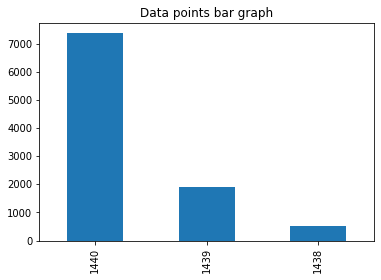

In [ ]:
# n_daily_data_points column
autolib_new['n_daily_data_points'].value_counts().plot(kind='bar')
plt.title('Data points bar graph')
plt.show()

point 1440 is the frequented daily data point with point 1438 being the least.

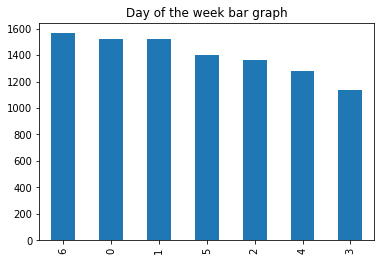

In [ ]:
# day of the week column
autolib_new['day_of_week'].value_counts().plot(kind='bar')
plt.title('Day of the week bar graph')
plt.show()

day 6 (Sunday) has most records followed closely by day 0(Monday) and day 1(Tuesday)

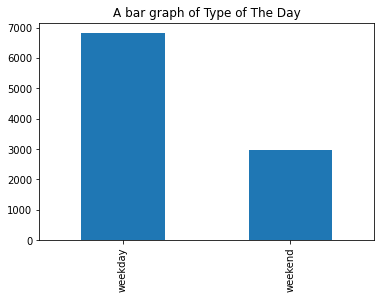

In [ ]:
# type of the day  column
autolib_new['day_type'].value_counts().plot(kind='bar')
plt.title('A bar graph of Type of The Day')
plt.show()

Weekdays have the most pick up recordeds compared to weekends.

In [ ]:
#frequency table of Number of BlueCars taken column
pd.crosstab(autolib_new['bluecars_taken_sum'], columns='count')

col_0,count
bluecars_taken_sum,
0,36
1,84
2,104
3,131
4,121
...,...
287,1
290,1
291,1


There were 275 bluecars that were taken in the course of that week.


In [ ]:
#frequency table of Number of BlueCars returned column
pd.crosstab(autolib_new['bluecars_returned_sum'], columns='count')

col_0,count
bluecars_returned_sum,
0,15
1,84
2,105
3,111
4,120
...,...
286,1
288,1
291,2


There were 269 bluecars that returned.


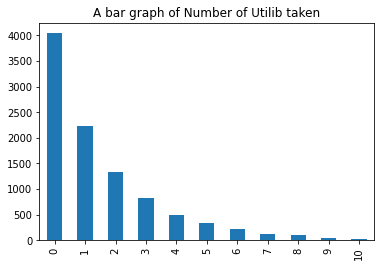

In [ ]:
# number of utilib taken column
autolib_new['utilib_taken_sum'].value_counts().plot(kind='bar')
plt.title('A bar graph of Number of Utilib taken')
plt.show()

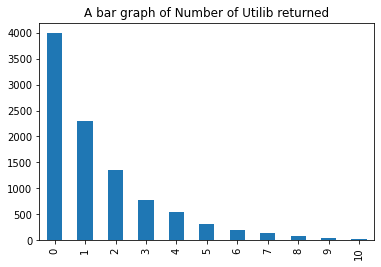

In [ ]:
# utilib returned   column
autolib_new['utilib_returned_sum'].value_counts().plot(kind='bar')
plt.title('A bar graph of Number of Utilib returned')
plt.show()

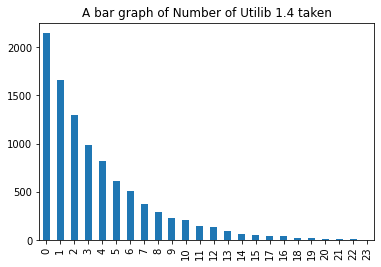

In [ ]:
# utilib 1.4 taken  column
autolib_new['utilib_14_taken_sum'].value_counts().plot(kind='bar')
plt.title('A bar graph of Number of Utilib 1.4 taken')
plt.show()

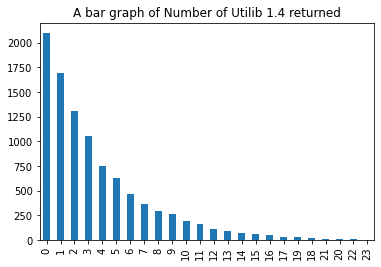

In [ ]:
# utilib 1.4 returned  column
autolib_new['utilib_14_returned_sum'].value_counts().plot(kind='bar')
plt.title('A bar graph of Number of Utilib 1.4 returned')
plt.show()

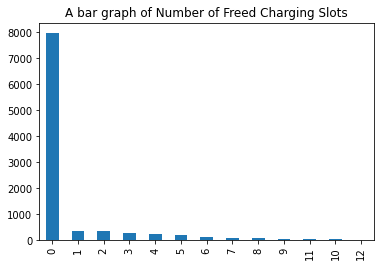

In [ ]:
# freed recharging slots column
autolib_new['slots_freed_sum'].value_counts().plot(kind='bar')
plt.title('A bar graph of Number of Freed Charging Slots')
plt.show()

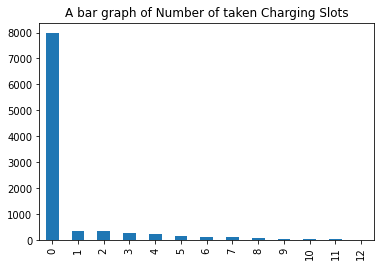

In [ ]:
# taken recharging slots column
autolib_new['slots_taken_sum'].value_counts().plot(kind='bar')
plt.title('A bar graph of Number of taken Charging Slots')
plt.show()

B). Bivariate Analysis

Text(0, 0.5, 'Day Type')

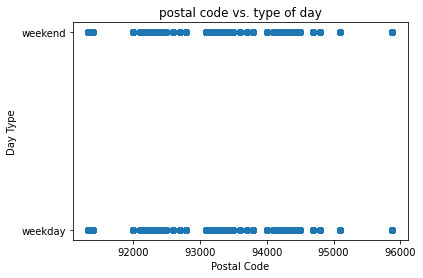

In [ ]:
#comparing the relationship between type of day and other variables
#create scatterplot of postal code vs. type of day
plt.scatter(autolib_new.postal_code, autolib_new.day_type)
plt.title('postal code vs. type of day')
plt.xlabel('Postal Code')
plt.ylabel('Day Type')

The obseravtion is that postal code is distrubuted the same on both weekdays and weekends 

Text(0, 0.5, 'Day Type')

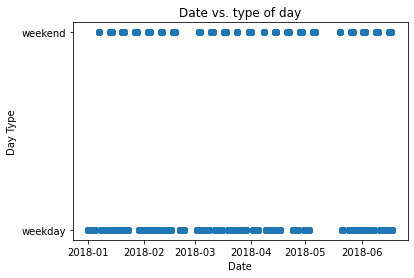

In [ ]:
#create scatterplot of date vs. type of day
plt.scatter(autolib_new.date, autolib_new.day_type)
plt.title('Date vs. type of day')
plt.xlabel('Date')
plt.ylabel('Day Type')

It is observed that dates on weekdays are the most concetrated hence days with popular pick up.

Text(0, 0.5, 'Day Type')

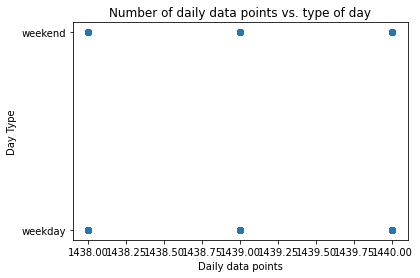

In [ ]:
#create scatterplot of number of daily data points vs. type of day
plt.scatter(autolib_new.n_daily_data_points, autolib_new.day_type)
plt.title('Number of daily data points vs. type of day')
plt.xlabel('Daily data points')
plt.ylabel('Day Type')

The pick puck data points are same for weekdays and weekends.

Text(0, 0.5, 'Day Type')

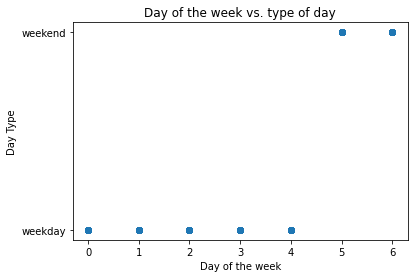

In [ ]:
#create scatterplot of day of the week vs. type of day
plt.scatter(autolib_new.day_of_week, autolib_new.day_type)
plt.title('Day of the week vs. type of day')
plt.xlabel('Day of the week')
plt.ylabel('Day Type')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of bluecars taken vs. type of day')

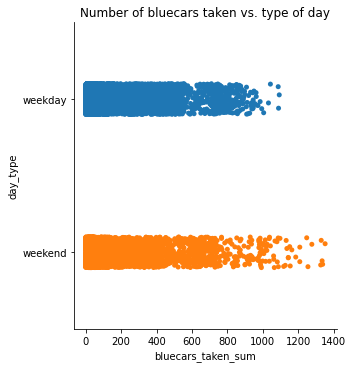

In [ ]:
#create cat plot of number of bluecars taken vs. type of day
sns.catplot('bluecars_taken_sum', 'day_type', data=autolib)
plt.title('Number of bluecars taken vs. type of day')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of bluecars returned vs. type of day')

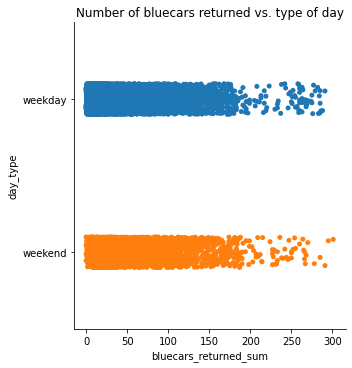

In [ ]:
#create catplot of number of bluecars taken vs. type of day
sns.catplot('bluecars_returned_sum', 'day_type', data=autolib_new)
plt.title('Number of bluecars returned vs. type of day')


Text(0.5, 1.0, 'Number of Utilib taken vs. type of day')

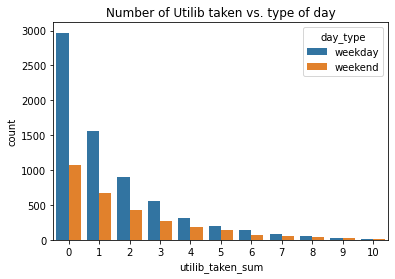

In [ ]:
#create bar plot of number of utilib taken vs. type of day
sns.countplot(x='utilib_taken_sum',hue='day_type',data=autolib_new)
plt.title('Number of Utilib taken vs. type of day')


Text(0.5, 1.0, 'Number of Utilib returned vs. type of day')

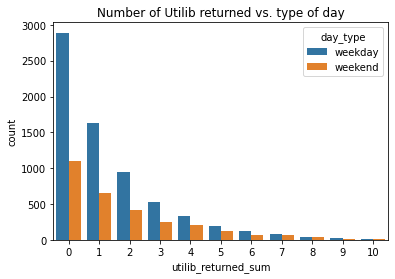

In [ ]:
#create bar plot of number of utilib returned vs. type of day
sns.countplot(x='utilib_returned_sum', hue='day_type', data=autolib_new)
plt.title('Number of Utilib returned vs. type of day')


Observation: Weekdays had a higher number of utilib being taken and also returning as compared to weekends.

Text(0.5, 1.0, 'Number of Utilib 14 taken vs. type of day')

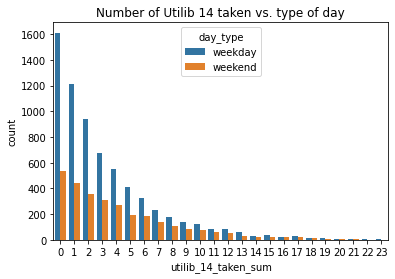

In [ ]:
#create bar plot of number of utilib 14 taken vs. type of day
sns.countplot(x='utilib_14_taken_sum',hue='day_type',data=autolib_new)
plt.title('Number of Utilib 14 taken vs. type of day')

Text(0.5, 1.0, 'Number of Utilib 14 returned vs. type of day')

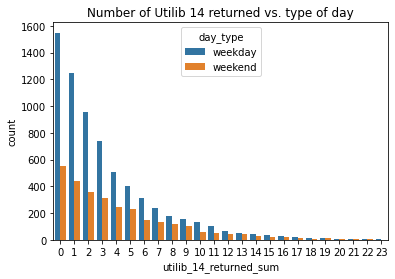

In [ ]:
#create bar plot of number of utilib returned vs. type of day
sns.countplot(x='utilib_14_returned_sum', hue='day_type', data=autolib_new)
plt.title('Number of Utilib 14 returned vs. type of day')

Observation: 
most utilib 14 were taken on weekdays as compared to weekends and also the returning ones are high on weekdays than on weekends.

Text(0.5, 1.0, 'Number of Freed recharging slots vs. type of day')

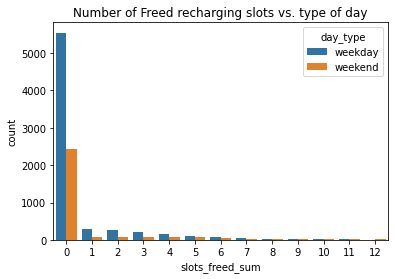

In [ ]:
#create bar plot of number of freed recharge slots vs. type of day
sns.countplot(x='slots_freed_sum', hue='day_type', data=autolib_new)
plt.title('Number of Freed recharging slots vs. type of day')

Text(0.5, 1.0, 'Number of Taken recharging slots vs. type of day')

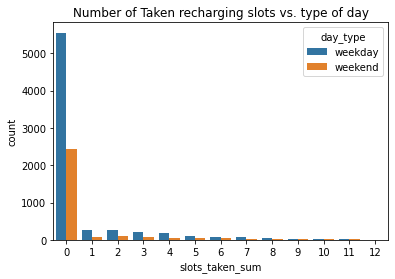

In [ ]:
#create bar plot of number of taken recharge slots vs. type of day
sns.countplot(x='slots_taken_sum', hue='day_type', data=autolib_new)
plt.title('Number of Taken recharging slots vs. type of day')

Observation:

Free recharging slots are many on weekdays and also recharging slots are also highly taken on weekdays.

<function matplotlib.pyplot.show>

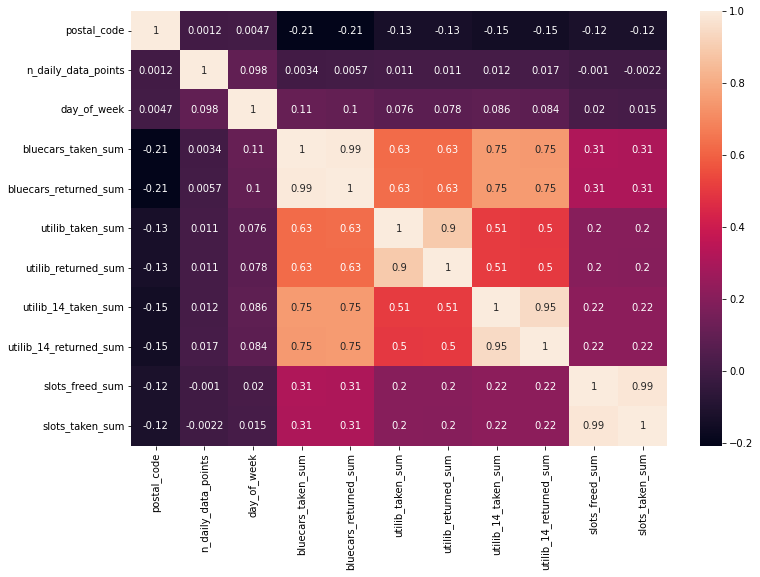

In [ ]:
# checking the correlation between variables 

plt.figure(figsize=(12, 8))
sns.heatmap(autolib_new.corr(),annot=True)
plt.show

days of the week, Bluecars, utilib, Utili 14 and charging slots are positively correlated with other variables.

## 5. Implementation (Hypthosis Testing)

a. Sampling technique

In [ ]:
## performing sampling technique
#Stratified sampling 

strat_output = autolib_new.groupby('day_type', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the non_stratified sample
print(strat_output['day_type'].value_counts())

# Check the stratified output
print(strat_output)

weekday    682
weekend    296
Name: day_type, dtype: int64
       postal_code       date  ...  slots_freed_sum  slots_taken_sum
15247        94500 2018-04-12  ...                0                0
13338        94110 2018-03-05  ...                0                0
14230        94220 2018-01-17  ...                0                0
12221        93440 2018-02-01  ...                0                0
5308         92150 2018-01-08  ...                2                2
...            ...        ...  ...              ...              ...
15214        94500 2018-03-10  ...                0                0
4251         91400 2018-02-10  ...                0                0
6674         92240 2018-05-20  ...                0                0
11341        93310 2018-01-07  ...                0                0
11118        93260 2018-04-08  ...                8                8

[978 rows x 13 columns]


b) Defining the Hypothesis


H0 <= weekdays are most popular days for picking a share electric car

H1 > weekadays are less popular days of picking a shared electric car (claim)


c) Stating the signifance level

alpha = 0.05

d) calculating the pvalue

In [ ]:
# performing calculation to find the pvalue

# zscore formula (mu - sample mean)/ STD
import statistics
mu = autolib_new['day_type'].value_counts().mean()
print("mu: ", mu)

x = strat_output['day_type'].value_counts().mean()
print("X: ", x)

std = statistics.stdev(autolib_new['day_of_week'].value_counts())
print("STD: ", std)

zscore = (mu - x) / std
print("statistic: ", zscore)

mu:  4891.5
X:  489.0
STD:  154.6715413845925
statistic:  28.463542553397946


In [ ]:
# getting the pvalue

# calculate the p-value
from scipy.stats import norm
p = norm.cdf(zscore)
print("p value: ", p)
# interpret via p-value
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis. Weekdays are most popular days for picking a share electric .')
else:
	print('Reject the null hypothesis. Weekdays are less popular days for picking a share electric car.')

p value:  1.0
Accept null hypothesis. Weekdays are most popular days for picking a share electric .


## 6. Conclusion

We do not have enough significat prove that weekdays are less popular days to pick a shared electric car. Therefore we accept the null hypothesis that weekdays are most popular days to pick a shared electric car.

